# Introduction

This notebook is a data analysis in the viewpoint of a foreign tourist planning to stay in melbourne for the holidays. 

Data for this analysis are from http://insideairbnb.com/get-the-data Date data compiled: 10 December 2022

Pictures used in this analysis are made using tableau

In [1]:
import pandas as pd
import sqlite3

In [2]:
#read the CSV
df = pd.read_csv('/Users/khai/Desktop/Airbnb Listings.csv')
#connect to a database
conn = sqlite3.connect("Melebourne_Airbnb.db") #if the db does not exist, this creates a Any_Database_Name.db file in the current directory
#store your table in the database:
df.to_sql('Melbourne_Listings', conn)
#read a SQL Query out of your database and into a pandas dataframe
sql_string = 'SELECT * FROM Melbourne_Listings'
df = pd.read_sql(sql_string, conn)

In [16]:
df = pd.read_sql(sql_string, conn)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19616 entries, 0 to 19615
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           19616 non-null  int64  
 1   id                              19616 non-null  int64  
 2   name                            19614 non-null  object 
 3   host_id                         19616 non-null  int64  
 4   host_name                       19614 non-null  object 
 5   neighbourhood_group             0 non-null      object 
 6   neighbourhood                   19616 non-null  object 
 7   latitude                        19616 non-null  float64
 8   longitude                       19616 non-null  float64
 9   room_type                       19616 non-null  object 
 10  price                           19616 non-null  int64  
 11  minimum_nights                  19616 non-null  int64  
 12  number_of_reviews               

# Data Cleaning

Since Neighbourhood Group and License are all empty, we can drop them.

In [18]:
df = df.drop(['neighbourhood_group','license'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19616 entries, 0 to 19615
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           19616 non-null  int64  
 1   id                              19616 non-null  int64  
 2   name                            19614 non-null  object 
 3   host_id                         19616 non-null  int64  
 4   host_name                       19614 non-null  object 
 5   neighbourhood                   19616 non-null  object 
 6   latitude                        19616 non-null  float64
 7   longitude                       19616 non-null  float64
 8   room_type                       19616 non-null  object 
 9   price                           19616 non-null  int64  
 10  minimum_nights                  19616 non-null  int64  
 11  number_of_reviews               19616 non-null  int64  
 12  last_review                     

Let's look at some entries

In [19]:
df.head()

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,668738,Stylish Modern Apt_St Kilda Beach,3384635,Susan,Port Phillip,-37.85947,144.98093,Entire home/apt,120,10,14,2022-11-28,0.12,1,106,3
1,1,9835,Beautiful Room & House,33057,Manju,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,364,0
2,2,671981,Sofabed in Yarraville - nice sub,3395313,Tyler,Maribyrnong,-37.81507,144.88895,Shared room,100,1,0,None,NaN,1,365,0
3,3,690762,Room To Let Next to Chilsom Tafe,3529788,Thomas,Greater Dandenong,-37.97413,145.21955,Private room,80,1,1,2014-03-01,0.01,1,0,0
4,4,692694,Windsor Pad with Private Courtyard,3542892,Saskia,Stonnington,-37.85680,145.00065,Entire home/apt,195,4,80,2022-10-14,0.64,1,99,12


We can see 2 fields 'minimum_nights' and 'availability_365'. There might be some entries where the min_night > availability. These entries will not be valid and thus may affect the analysis.

In [21]:
invalid_entries_df = df[df['minimum_nights'] > df['availability_365']]
invalid_entries_df

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,3,690762,Room To Let Next to Chilsom Tafe,3529788,Thomas,Greater Dandenong,-37.974130,145.219550,Private room,80,1,1,2014-03-01,0.01,1,0,0
7,7,739896,3 Level Apartment with Rooftop!,3871035,Phil,Moreland,-37.770560,144.972740,Entire home/apt,300,2,3,2014-01-03,0.02,1,0,0
8,8,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,Port Phillip,-37.859990,144.976620,Entire home/apt,95,3,42,2020-03-15,0.28,10,0,0
9,9,1349937,SouthYarra SkyHigh(2br+WIFI+CARP),3721646,Alex,Stonnington,-37.836990,144.997350,Entire home/apt,160,21,54,2020-01-01,0.47,41,0,0
13,13,1357290,"2 Bedroom 3 Level Home, Abundant Light Space. ...",814722,Shanti,Port Phillip,-37.865350,144.996580,Entire home/apt,229,14,111,2022-11-15,0.97,1,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19518,19518,776598937966776696,Snug 1-Bed Unit in a Peaceful Local,235135883,MadeComfy Melbourne,Moonee Valley,-37.775780,144.930241,Entire home/apt,157,1,0,None,NaN,29,0,0
19521,19521,777394196881623996,Cosy 2-Bed Apartment in Central Melbourne,235135883,MadeComfy Melbourne,Melbourne,-37.807183,144.967202,Entire home/apt,207,1,0,None,NaN,29,0,0
19610,19610,772284231483985955,Executive 2-Bed Apartment with a Pool,235135883,MadeComfy Melbourne,Melbourne,-37.816506,144.954298,Entire home/apt,196,1,0,None,NaN,29,0,0
19614,19614,772411782258325013,Boutique 1-Bed Terrace Metres from Chapel St,235135883,MadeComfy Melbourne,Stonnington,-37.849268,144.993904,Entire home/apt,199,1,0,None,NaN,29,0,0


As seen, there are 6506 entries with min_nights > availability. These invalid entries will be removed from the dataset.

In [22]:
df = df[df['minimum_nights'] <= df['availability_365']]
df

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,668738,Stylish Modern Apt_St Kilda Beach,3384635,Susan,Port Phillip,-37.859470,144.980930,Entire home/apt,120,10,14,2022-11-28,0.12,1,106,3
1,1,9835,Beautiful Room & House,33057,Manju,Manningham,-37.772470,145.092320,Private room,60,1,4,2015-09-12,0.03,1,364,0
2,2,671981,Sofabed in Yarraville - nice sub,3395313,Tyler,Maribyrnong,-37.815070,144.888950,Shared room,100,1,0,None,NaN,1,365,0
4,4,692694,Windsor Pad with Private Courtyard,3542892,Saskia,Stonnington,-37.856800,145.000650,Entire home/apt,195,4,80,2022-10-14,0.64,1,99,12
5,5,712261,Charming 1930s Flat East St Kilda,738640,Chelle,Port Phillip,-37.869280,144.997920,Entire home/apt,95,5,22,2020-12-21,0.18,1,253,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,19608,772230790038244788,Large private room at the heart of Melbourne CBD,55349800,TheBestHost,Melbourne,-37.811052,144.960369,Private room,93,5,0,None,NaN,3,87,0
19609,19609,772237104584253411,（墨尔本中央商务区）全新整套公寓型住宅（一房一卫）可住2人,362461785,Haiting,Melbourne,-37.813303,144.954047,Entire home/apt,174,2,0,None,NaN,5,352,0
19611,19611,772289177214389054,Stunning Views Stylish Deco,290215359,Eleni,Port Phillip,-37.859950,144.983810,Entire home/apt,197,3,1,2022-12-08,1.00,2,151,1
19612,19612,772304036319234309,In the heart of Melbourne,377578141,Beata,Melbourne,-37.813586,144.968723,Entire home/apt,180,3,1,2022-12-09,1.00,1,311,1


In [23]:
df2 = df.groupby(['minimum_nights'])['minimum_nights'].count()
pd.set_option('display.max_rows', 500)
df2

minimum_nights
1      4152
2      4374
3      1750
4       491
5       609
6       118
7       855
8        28
9         5
10       74
12       12
13       10
14      203
15       12
16        1
17        2
18        7
20       24
21       57
22        1
23        1
24        2
25        8
26        1
27        1
28       85
29        5
30       93
31        1
35        4
40        3
43        1
45        5
50        2
55        1
56        2
58        1
60       26
70        4
77        1
80        1
83        1
84        2
90       37
100       8
119       1
120       4
130       1
150       1
175       1
180      11
182       1
185       1
200       1
300       1
350       1
356       1
360       1
365       3
Name: minimum_nights, dtype: int64

Since Australia's visa allows for up to 90 days per entry, we shall remove the entries which require more than 90 days minimum nights.

In [55]:
df = df[df['minimum_nights'] <= 90]
df.head()

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,668738,Stylish Modern Apt_St Kilda Beach,3384635,Susan,Port Phillip,-37.85947,144.98093,Entire home/apt,120,10,14,2022-11-28,0.12,1,106,3
1,1,9835,Beautiful Room & House,33057,Manju,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,364,0
2,2,671981,Sofabed in Yarraville - nice sub,3395313,Tyler,Maribyrnong,-37.81507,144.88895,Shared room,100,1,0,None,NaN,1,365,0
4,4,692694,Windsor Pad with Private Courtyard,3542892,Saskia,Stonnington,-37.85680,145.00065,Entire home/apt,195,4,80,2022-10-14,0.64,1,99,12
5,5,712261,Charming 1930s Flat East St Kilda,738640,Chelle,Port Phillip,-37.86928,144.99792,Entire home/apt,95,5,22,2020-12-21,0.18,1,253,0


# Data Analysis

### Min Number of Nights

In [28]:
df_min_night_avg = df["minimum_nights"].mean()
df_min_night_avg

3.681863382544175

The average number of nights is at least 4 nights. However, we can see that entries with 1 min night and 2 min nights form  32% and 33% of the listings respectively and expected the average to be closer to 2. This is due to a few entries with higher minimum nights 93 entries for 30 days, 26 entries for 60 days and 37 entries for 90 days which are outliers, skewing the data as they have more weight

Rather than using mean, it might be better to use median to avoid skewing of data

In [32]:
df_min_night_med = df["minimum_nights"].median()
df_min_night_med

2.0

Thus, we can see that most entries require at least 2 nights.

### Price per Neighbourhood

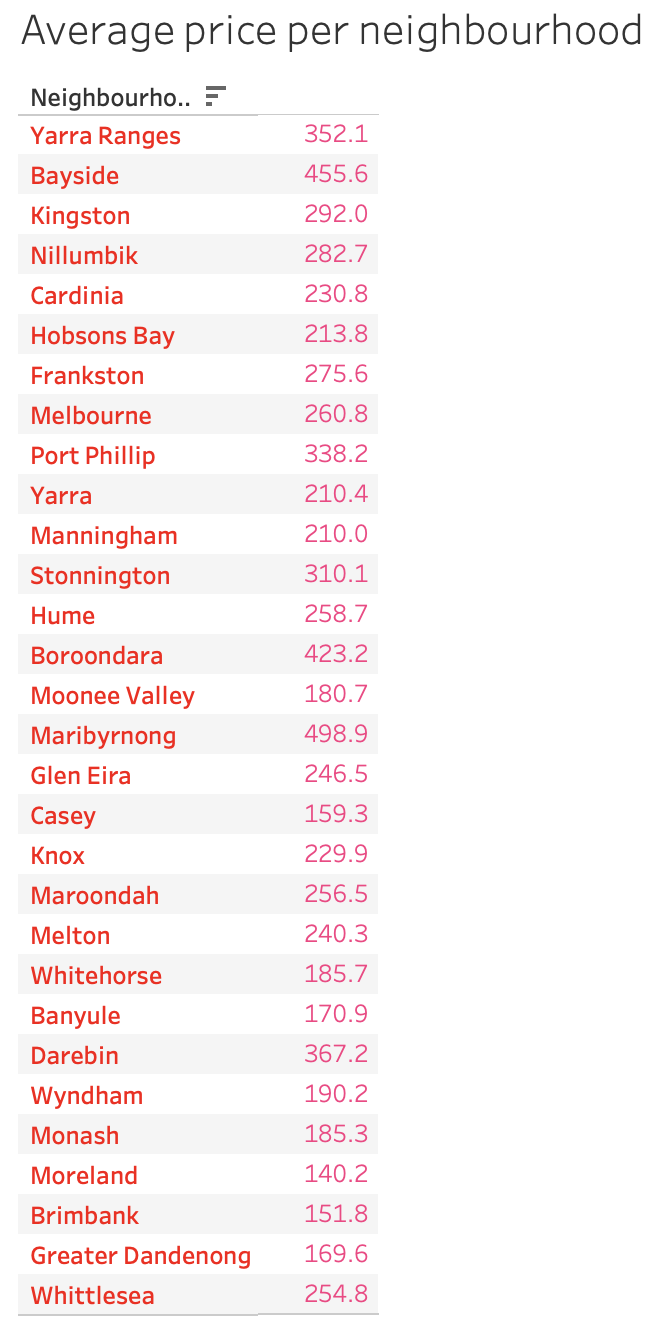

In [47]:
from IPython import display
display.Image(("/Users/khai/Desktop/Airbnb Analysis/Average Price:Neighbourhood.png"), width = 350)

We can see that the Average price per neighbourhood is surprisingly spread out ranging from 140 in Moreland to 500 in Maribyrnong. 

Although Maribyrnong is a good neighbourhood and is relatively close to Melbourne CBD, I do not think it would have been that much higher to stay in compared to the other neighbourhoods. Let's look at the entries for Maribyrnong

In [43]:
Maribyrnong_df = df[df['neighbourhood'] == 'Maribyrnong']
Maribyrnong_df.sort_values(by = 'price', ascending = False)

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15702,15702,624160975153413676,not available. Airbnb won't cancel,143622222,Joshua,Maribyrnong,-37.813752,144.882320,Entire home/apt,149000,1,0,None,NaN,1,364,0
10559,10559,40545916,Yarraville Beauty,61038132,Shane,Maribyrnong,-37.821200,144.886670,Entire home/apt,1500,7,0,None,NaN,1,358,0
19231,19231,766749866712372318,"Spectacular style, envious luxury & comfort",53389651,Lauren,Maribyrnong,-37.816670,144.879520,Entire home/apt,1050,3,0,None,NaN,1,167,0
10079,10079,39318579,D120 Braybrook Lodge- super cleaned and sanitised,122979750,Dee,Maribyrnong,-37.787140,144.857930,Entire home/apt,916,5,3,2022-11-28,0.24,29,348,2
3812,3812,17515357,A Grand Mansion In Yarraville with parking,2078748,Brenda,Maribyrnong,-37.816180,144.893720,Entire home/apt,800,2,61,2022-11-07,0.95,2,327,17
7232,7232,28091267,*Yarraville•pet friendly•2bed•2bath•secure par...,6815177,Julia,Maribyrnong,-37.821770,144.886300,Entire home/apt,800,1,111,2022-11-15,2.15,6,254,25
3540,3540,16678458,Perfect retreat in Melbourne's quirky Yarraville,51246914,Chris,Maribyrnong,-37.822960,144.891680,Private room,650,1,15,2017-06-01,0.21,1,365,0
10159,10159,39386934,D129 West Footscray Lodge-cleaned and Sanitised,122979750,Dee,Maribyrnong,-37.791450,144.866210,Entire home/apt,627,5,1,2022-11-03,0.79,29,344,1
14843,14843,574769302924031551,Large 5-Bedroom Family Home,2614458,Michael,Maribyrnong,-37.793250,144.868780,Entire home/apt,604,2,17,2022-11-06,1.88,1,163,17
407,407,2178434,Stay Belgravia House,11111107,Kelly,Maribyrnong,-37.806960,144.901930,Entire home/apt,595,3,97,2022-10-01,0.91,1,28,1


We can see that there is a single entry that has an outrageously high price that is skewing the data. As with the min no of nights, we will use the median instead to get a better picture.

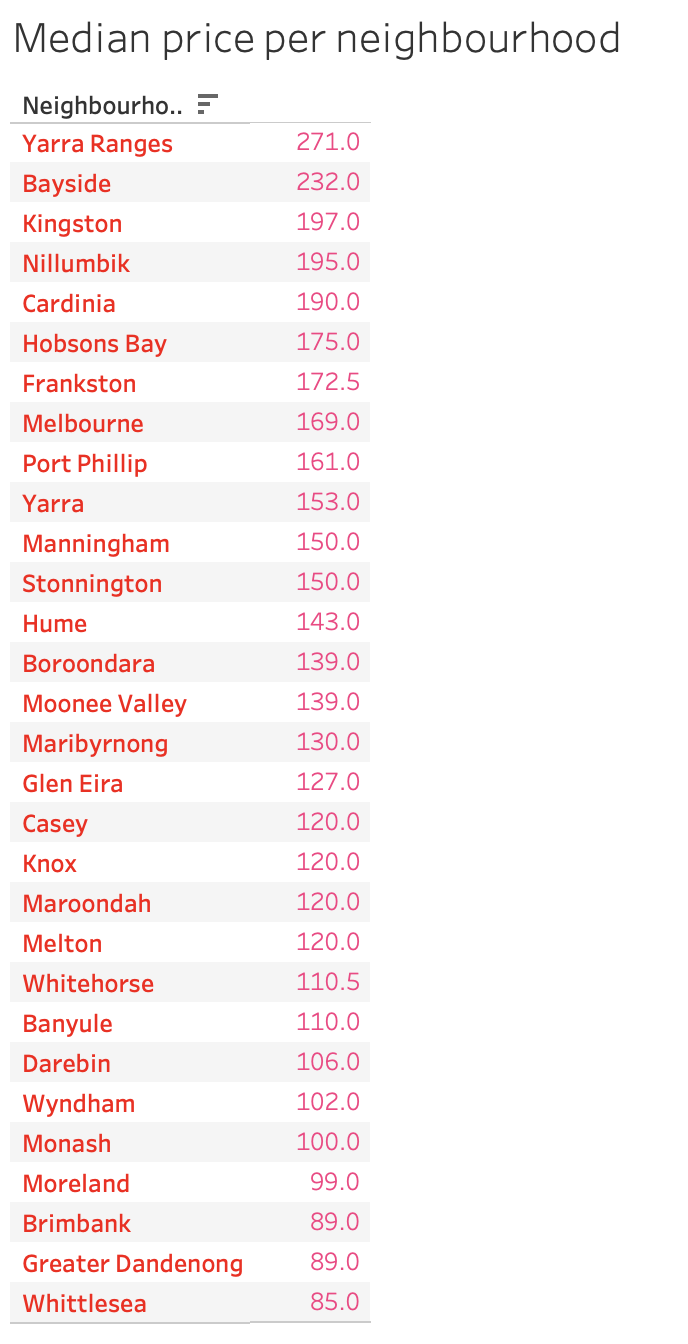

In [46]:
display.Image(("/Users/khai/Desktop/Airbnb Analysis/Median Price:Neighbourhood.png"), width = 350)

The median price shows a more evenly spread price range. 

It is also a more accurate rating as the Yarra Ranges has the Nature scenes that would make it's prices to be higher. Bayside also has the beach right nearby and thus, would be a popular location for tourists and locals to have a short stay there, causing the price to increase.

It also shows Whittlesea as the cheapest neighbourhood to book an Airbnb in. Whittlesea is family focused neighbourhood and thus would make sense why it is the cheapest neighbourhood as there is not much for tourists to do there and thus, no demand, resulting in a low price.

### Property Type

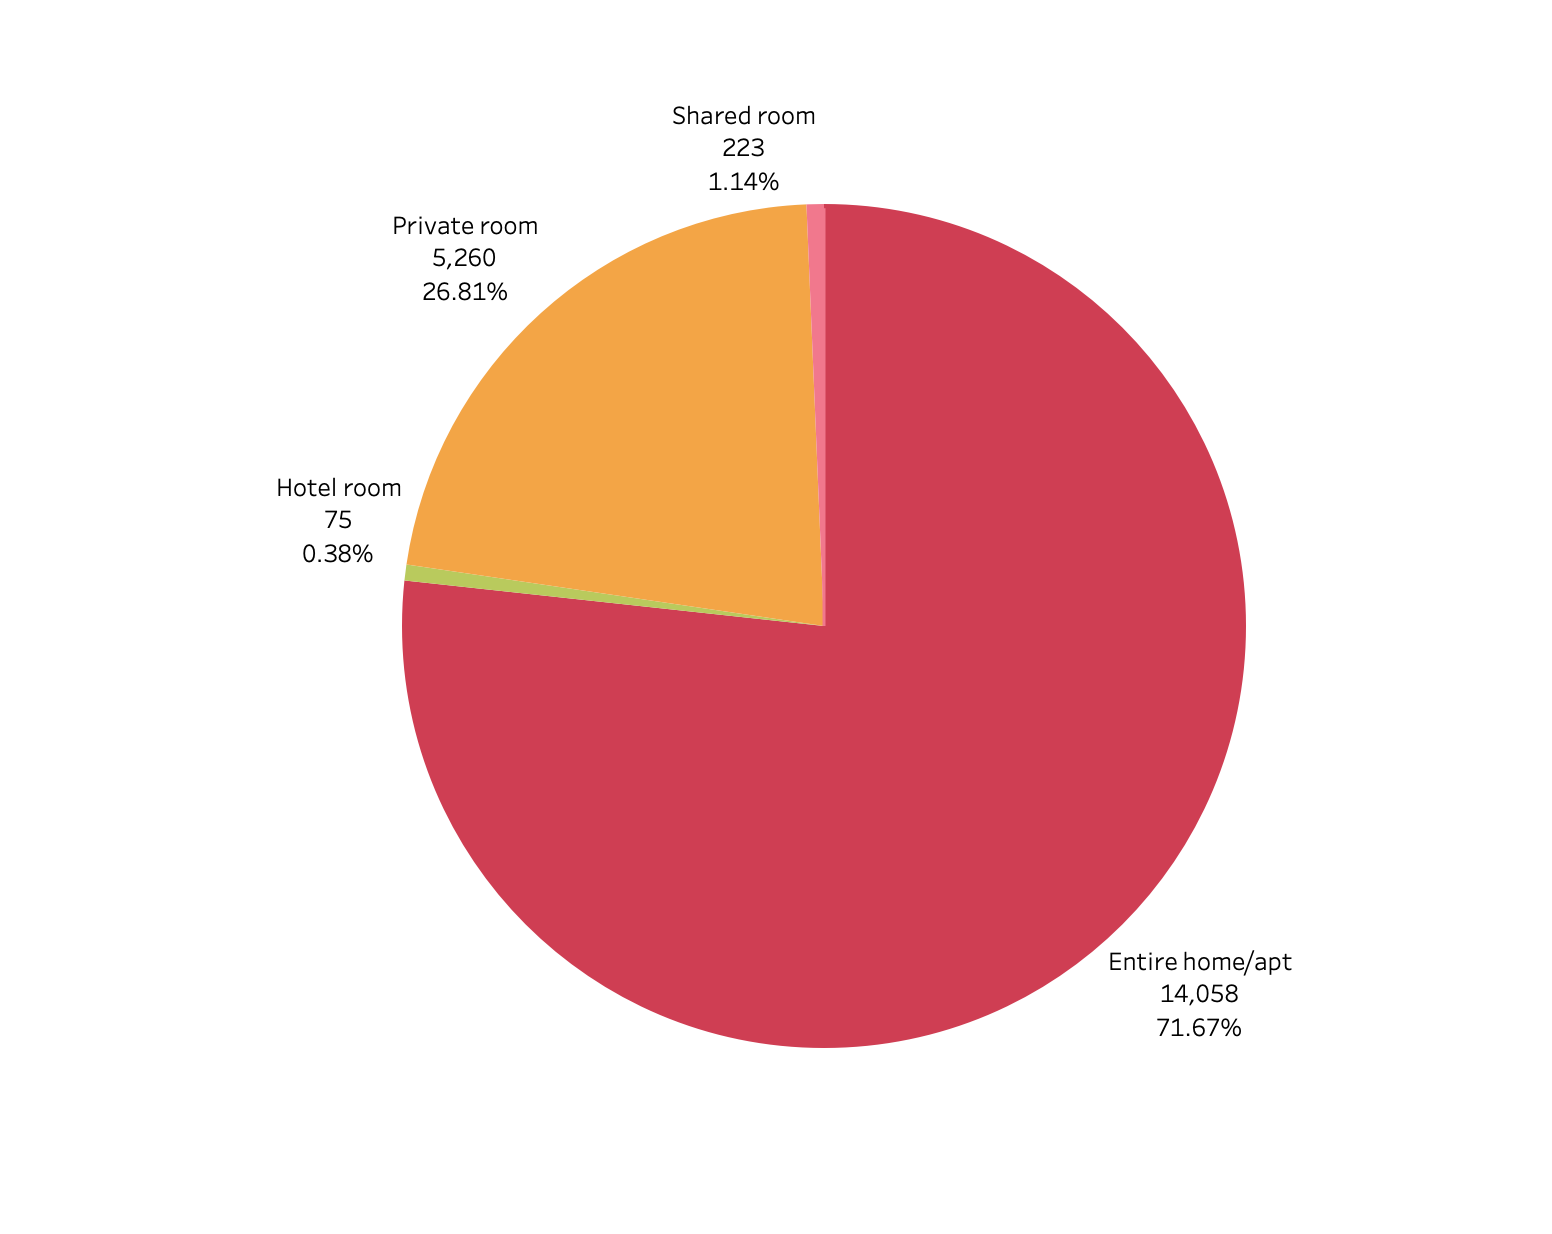

In [49]:
display.Image(("/Users/khai/Desktop/Airbnb Analysis/Property Type.png"))

In Melbourne, we can see that over 70% of the listings are entire houses/apartments which would be great for travellers in groups who would prefer privacy during the stay

There is also a large percentage, 27%, of the listings that are private rooms and would be better for travellers who would like to live with locals who would be good at suggesting hidden gems tourists would not typically be aware of

### Heat Map

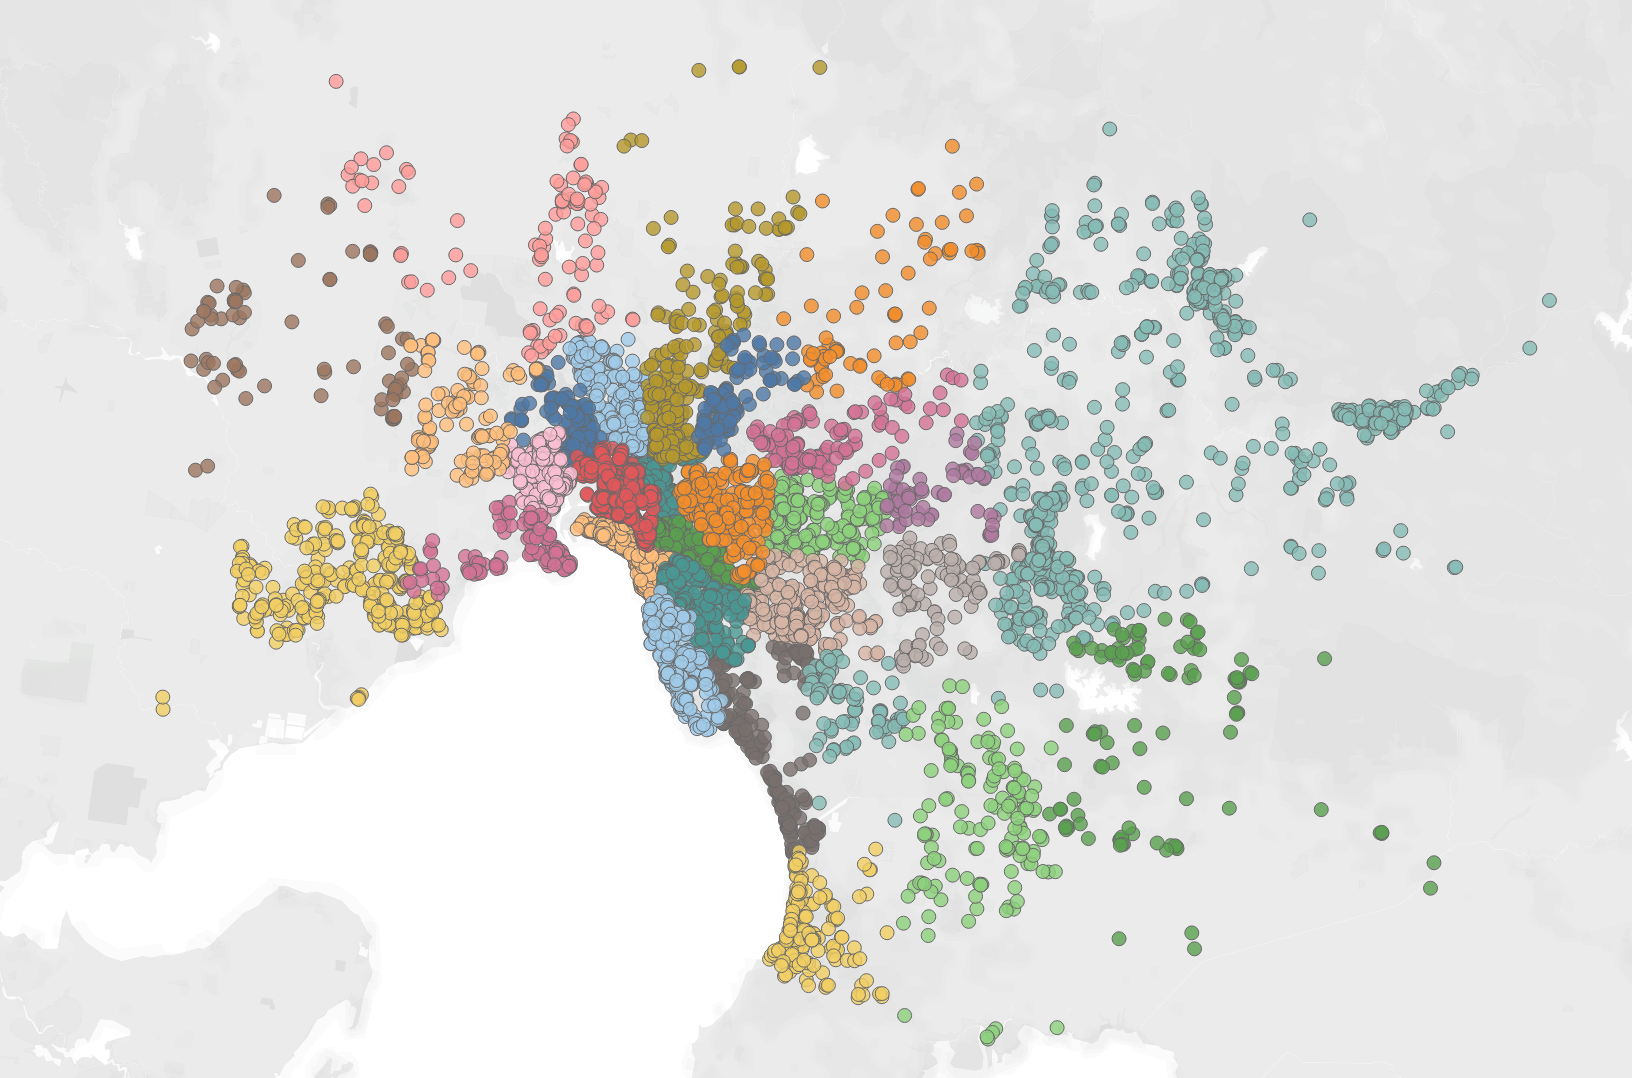

In [54]:
display.Image(("/Users/khai/Desktop/Airbnb Analysis/Heat Map.png"))

We can see that the majority of the property listings can be found closer to the centre of Melbourne and decreases the further we are from the centre

# Conclusion

However, we would not be able to decide on a specific property solely using the data from this analysis. Everyone has different ideas of a good trip, some are more city-style while others may be nature-lovers which would affect where they would like to stay. This is just one of many factors that may sway the location that one would book when they plan to visit Melbourne.